# Global Sensivity Analysis
This notebook contains analysis of the global sensitivity analysis performed 
on a fuel cycle transition from US fleet of Light Water Reactors to a fleet 
of advanced reactors. 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Xe-100 Share

In [81]:
xe100_files = {'gaussian':'xe100_share/xe100_share_gaussian.dat',
               'list':'xe100_share/xe100_share_list.dat',
               'quadratic':'xe100_share/xe100_share_quadratic.dat'}
xe100_data = {}
for key in xe100_files:
    xe100_data[key] = pd.read_csv(xe100_files[key], sep="\s+", header = 0)

/tmp/ipykernel_8673/1772680407.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


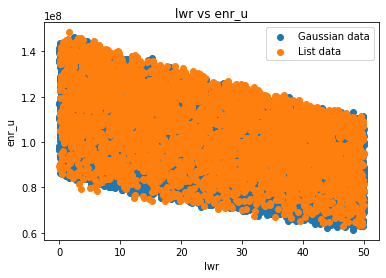

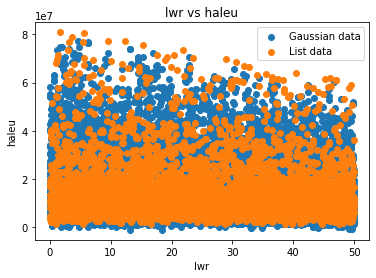

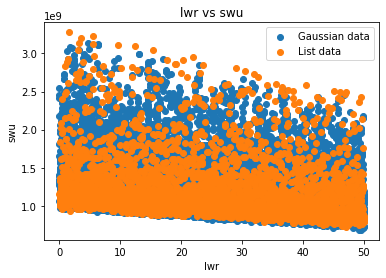

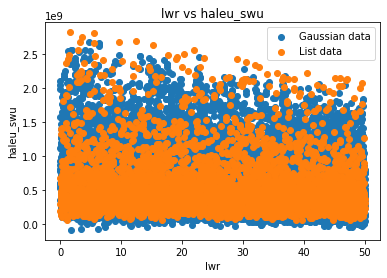

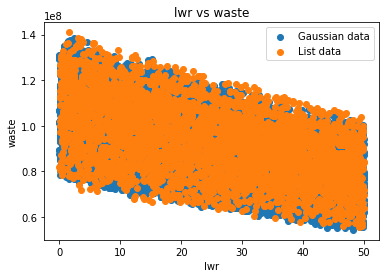

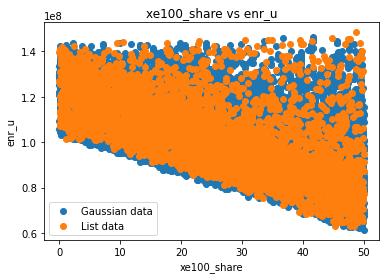

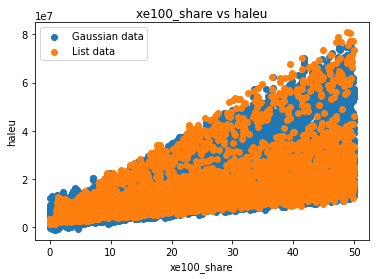

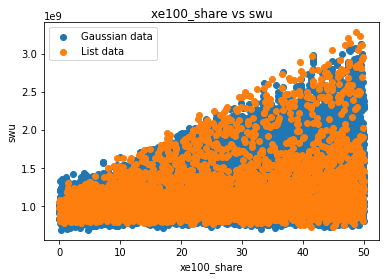

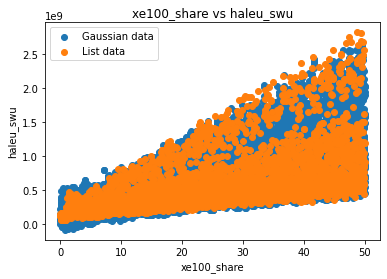

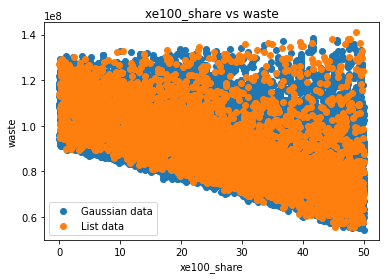

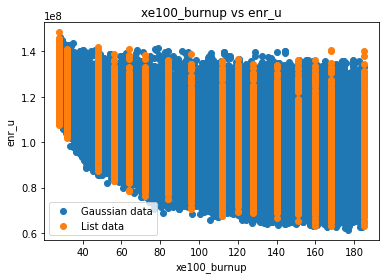

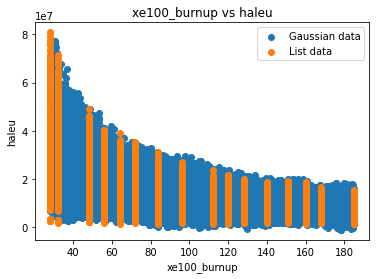

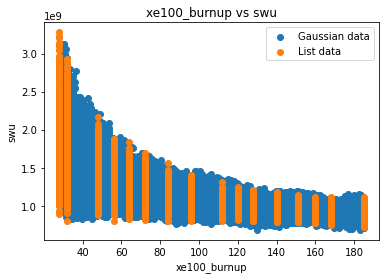

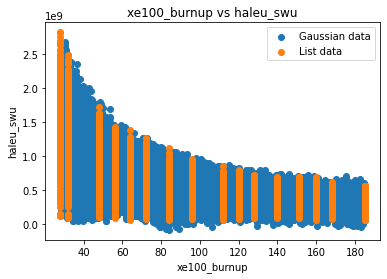

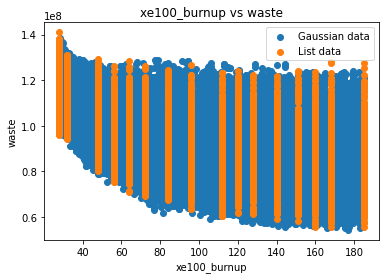

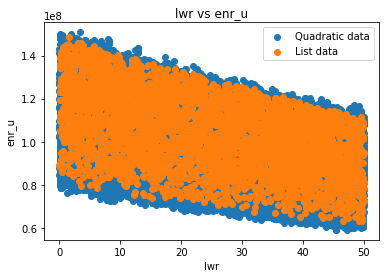

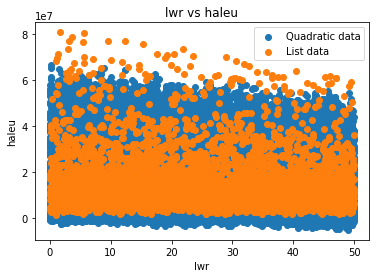

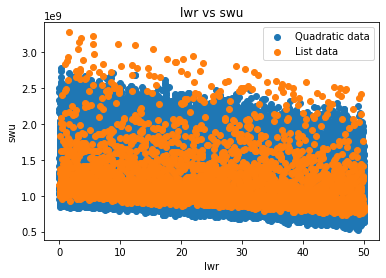

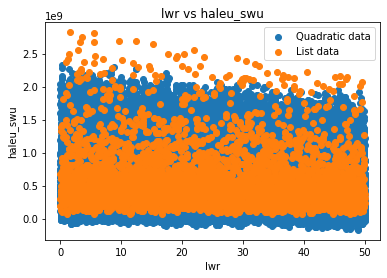

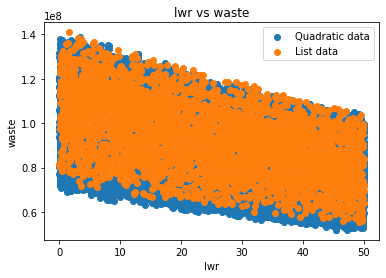

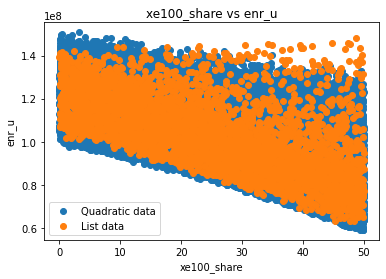

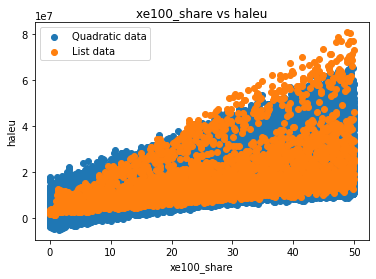

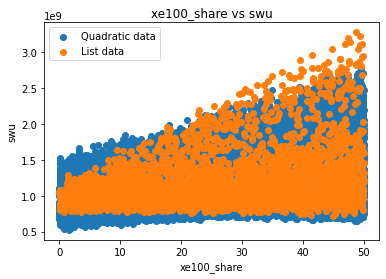

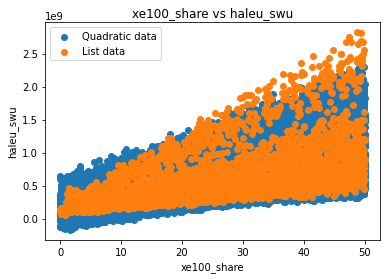

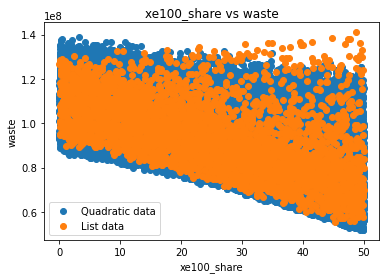

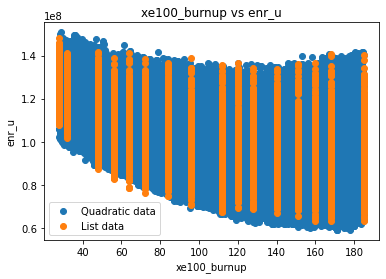

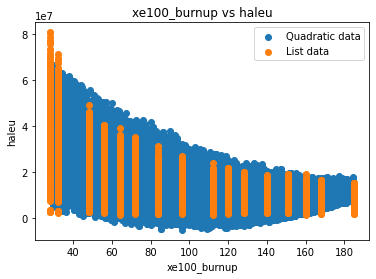

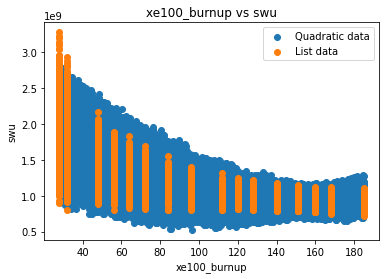

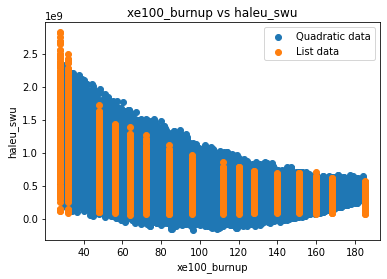

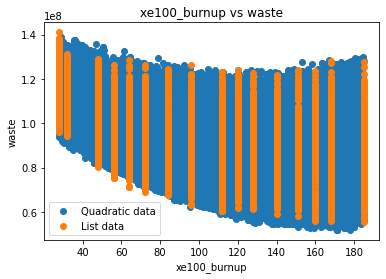

In [82]:
for key in ['gaussian', 'quadratic']:
    counter = 0
    for p_index, parameter in enumerate(['lwr','xe100_share','xe100_burnup']):
        for m_index, metric in enumerate(['enr_u','haleu','swu','haleu_swu','waste']):
            plt.figure()
            plt.scatter(xe100_data[key][parameter], xe100_data[key][metric], label=f"{key.capitalize()} data")
            plt.scatter(xe100_data['list'][parameter], xe100_data['list'][metric], label='List data')
            plt.xlabel(f"{parameter}")
            plt.ylabel(f"{metric}")
            plt.title(f"{parameter} vs {metric}")
            plt.legend()
            #plt.savefig(f"figures/xe100_share_{parameter}_{metric}_{file}.png")

## MMR Share

In [ ]:
mmr_files = {'gaussian':'mmr_share/mmr_share_gaussian.dat',
               'list':'mmr_share/mmr_share_list.dat',
               'quadratic':'mmr_share/mmr_share_quadratic.dat'}
mmr_data = {}
for key in mmr_files:
    mmr_data[key] = pd.read_csv(mmr_files[key], sep="\s+", header = 0)

In [ ]:
for key in ['gaussian', 'quadratic']:
    counter = 0
    for p_index, parameter in enumerate(['lwr','mmr_share','xe100_burnup']):
        for m_index, metric in enumerate(['enr_u','haleu','swu','haleu_swu','waste']):
            plt.figure()
            plt.scatter(mmr_data[key][parameter], mmr_data[key][metric], label=f"{key.capitalize()} data")
            plt.scatter(mmr_data['list'][parameter], mmr_data['list'][metric], label='List data')
            plt.xlabel(f"{parameter}")
            plt.ylabel(f"{metric}")
            plt.title(f"{parameter} vs {metric}")
            plt.legend()
            #plt.savefig(f"figures/xe100_share_{parameter}_{metric}_{file}.png")

## VOYGR Share

In [ ]:
voygr_files = {'gaussian':'voygr_share/voygr_share_gaussian.dat',
               'list':'voygr_share/voygr_share_list.dat',
               'quadratic':'voygr_share/voygr_share_quadratic.dat'}
voygr_data = {}
for key in voygr_files:
    voygr_data[key] = pd.read_csv(voygr_files[key], sep="\s+", header = 0)

In [ ]:
for key in ['gaussian', 'quadratic']:
    counter = 0
    for p_index, parameter in enumerate(['lwr','voygr_share','xe100_burnup']):
        for m_index, metric in enumerate(['enr_u','haleu','swu','haleu_swu','waste']):
            plt.figure()
            plt.scatter(voygr_data[key][parameter], voygr_data[key][metric], label=f"{key.capitalize()} data")
            plt.scatter(voygr_data['list'][parameter], voygr_data['list'][metric], label='List data')
            plt.xlabel(f"{parameter}")
            plt.ylabel(f"{metric}")
            plt.title(f"{parameter} vs {metric}")
            plt.legend()
            #plt.savefig(f"figures/xe100_share_{parameter}_{metric}_{file}.png")